# Studies of data reuse: Optogenetic stimulation of the cerebellar cortex in in vivo anesthetized mice (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Optogenetic stimulation of the cerebellar cortex in in vivo anesthetized mice (v1)](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=free%20access&species[0]=Mus%20musculus#53f3023c-4299-41b9-898b-821ed8e65545)", contributed by Egidio D’Angelo from department of Brain and Behavioral Sciences, University of Pavia, Pavia, Italy.

As we can see from the dataset description,

This project investigates the effect of optogenetic activation of the cerebellar cortex on deep cerebellar nuclei activity. It is known the Purkinje cells provide the sole output of the cerebellar cortex, inhibiting the deep cerebellar nuclei neurons. In this project, we recorded the responses of the fastigial nucleus to sensory tactile stimulation (air puffs on the whisker pad, upper lip, or lower lip).
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=free%20access&species[0]=Mus%20musculus#53f3023c-4299-41b9-898b-821ed8e65545).

This dataset forms part of the results reported in Moscato, L., Montagna, I., De Propris, L., Tritto, S., Mapelli, L., & D’Angelo, E. (2019). Long-Lasting Response Changes in Deep Cerebellar Nuclei in vivo Correlate With Low-Frequency Oscillations. *Frontiers in Cellular Neuroscience*, **13**. https://www.frontiersin.org/articles/10.3389/fncel.2019.00084/full

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Notes: 
.tbk files unsure how to read them. Tried opening them with Neo but didn't get useful results. 

In [2]:
from neo.io.basefromrawio import BaseFromRaw
from neo.rawio.tdtrawio import TdtRawIO


class TdtIO(TdtRawIO, BaseFromRaw):
    """
    Class for reading data from from Tucker Davis TTank format.
    Terminology:
    TDT holds data with tanks (actually a directory). And tanks hold sub blocks
    (sub directories).
    Tanks correspond to Neo Blocks and TDT blocks correspond to Neo Segments.
    """
    _prefered_signal_group_mode = 'group-by-same-units'
    mode = 'dir'

    def __init__(self, dirname):
        TdtRawIO.__init__(self, dirname=dirname)
        BaseFromRaw.__init__(self, dirname)

In [2]:
import neo
import matplotlib.pyplot as plt
from neo import get_io

In [34]:
reader = neo.io.ExampleIO("hbp-d000024_MEA-in-vivo-optogenetics_pub/MEA-opto_Subject01_17-05-18/Block-124/DEMOTANK2_Block-124.Tbk")
block = reader.read(lazy=False)[0]  # get the first block
segment = block.segments[1]         # get data from first (and only) segment
signals = segment.analogsignals[1]  # get first (multichannel) signal

print(reader)
print(block)
print(segment)
print(signals)

ExampleIO: hbp-d000024_MEA-in-vivo-optogenetics_pub/MEA-opto_Subject01_17-05-18/Block-124/DEMOTANK2_Block-124.Tbk
nb_block: 2
nb_segment:  [2, 3]
signal_streams: [stream 0 (chans: 8), stream 1 (chans: 8)]
signal_channels: [ch0, ch1, ch2, ch3 ... ch12 , ch13 , ch14 , ch15]
spike_channels: [unit0, unit1, unit2]
event_channels: [Some events, Some epochs]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] uV


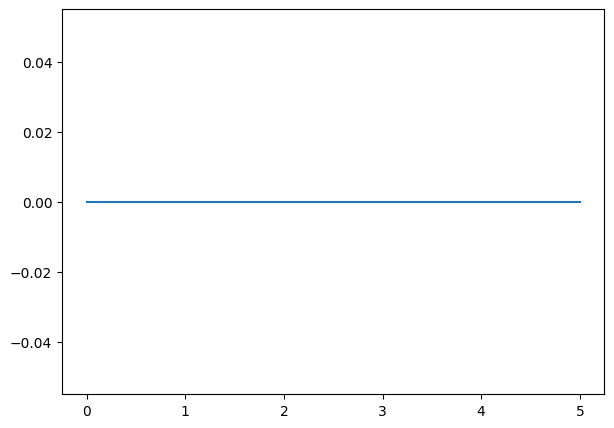

In [19]:
plt.plot(signals[0])

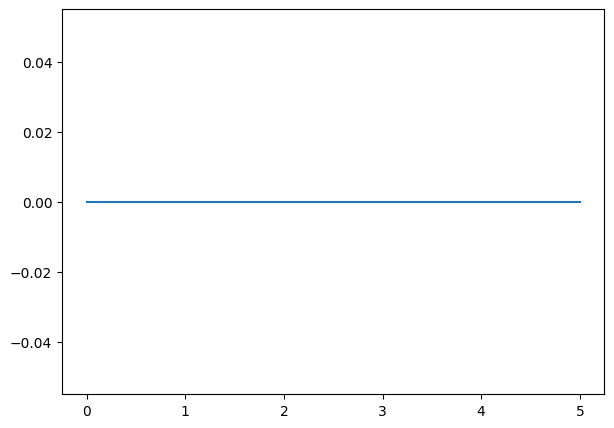

In [20]:
plt.plot(signals[1])

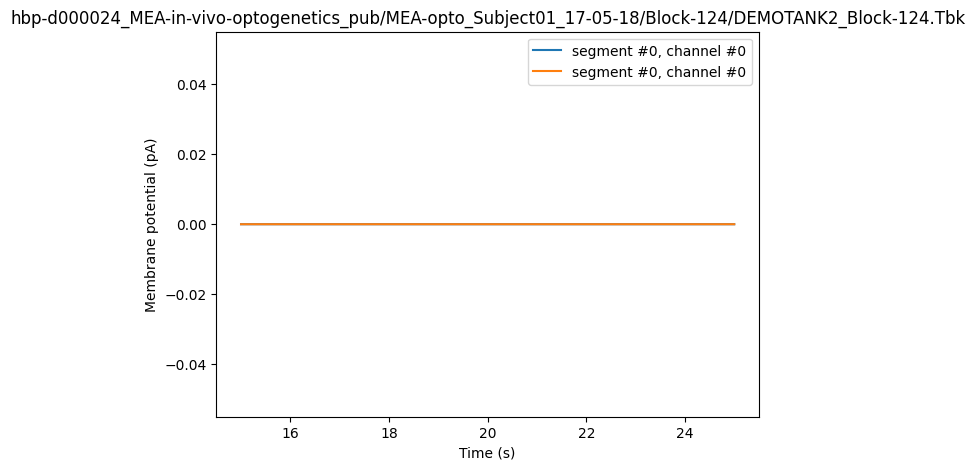

In [32]:
data = reader.read(lazy=True)
seg0 = data[0].segments[1]
channel0 = seg0.analogsignals[2]
channel0 = channel0.load()
channel0.array_annotations = {}
plt.plot(channel0.times, channel0, label="segment #0, channel #0")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.legend()
plt.title(f"{file_path}")
plt.show()

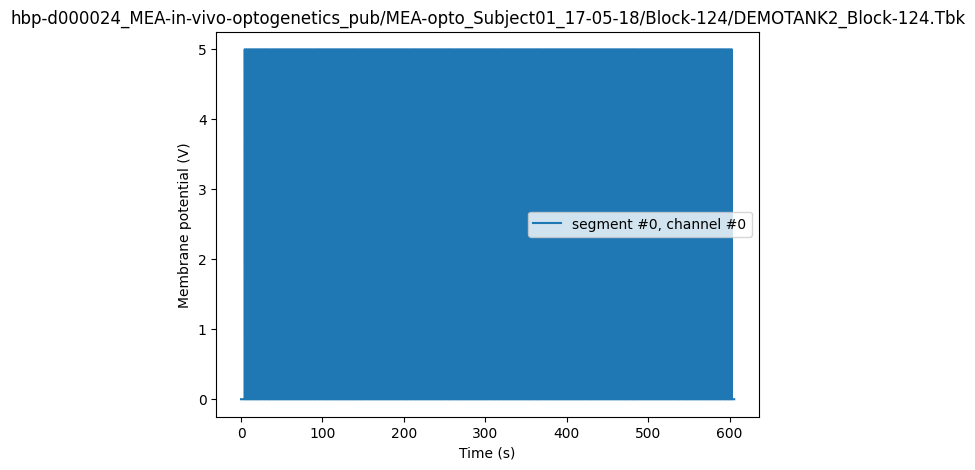

IndexError: list index out of range

In [12]:
n=0
while n<10:
    io = neo.io.TdtIO('hbp-d000024_MEA-in-vivo-optogenetics_pub/MEA-opto_Subject01_17-05-18/Block-124/DEMOTANK2_Block-124.Tbk')
    data = io.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[1]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label="segment #0, channel #0")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend()
    plt.title(f"{file_path}")
    plt.show()
    n=n+1